# Finetuning Grounding DINO on Hub's videos

### Groundng DINO

Grounding DINO (https://arxiv.org/pdf/2203.03605) can detect arbitrary objects with human inputs such as category names or referring expressions by marrying Transformer-based detector DINO with grounded pre-training.



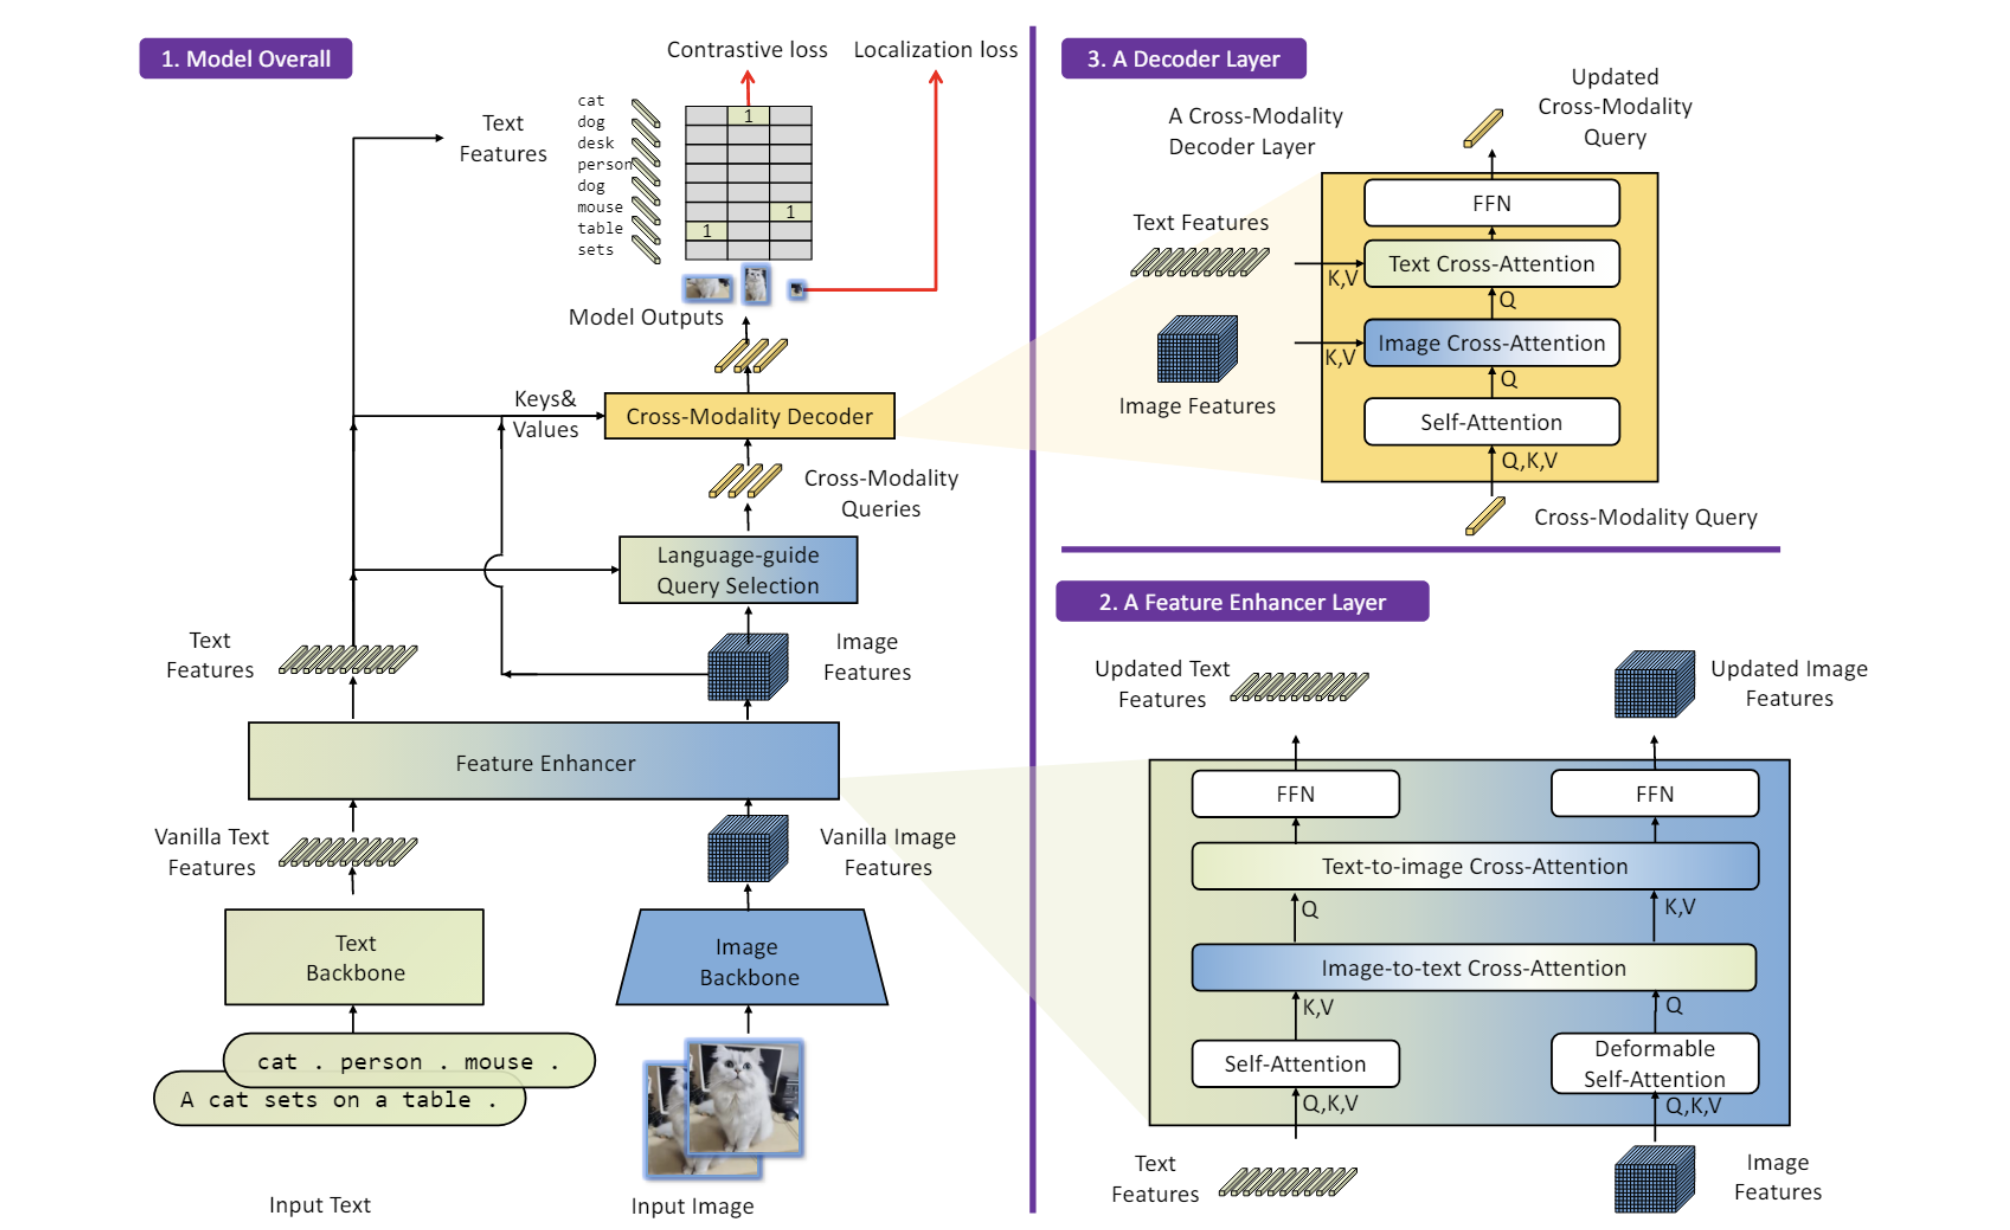

In order to finetune the Grounding DINOP model, we used MMDetection library.

Reference: https://github.com/open-mmlab/mmdetection/blob/main/configs/grounding_dino/README.md

Constants:

In [ ]:
base_model = 'grounding_dino_swin-t_finetune_16xb2_1x_coco.py'
classes = ('mouse', )

custom_ds = "/content/hub_for_neuroengineerig_solutions/challengig_frames"

epoch = 20

Finetuning code:

In [ ]:
num_classes = len(classes)
metainfo = dict(classes=classes, palette=[(220, 20, 60)])

model = dict(bbox_head=dict(num_classes=num_classes))

train_dataloader = dict(
    dataset=dict(
        data_root=custom_ds,
        metainfo=metainfo,
        ann_file='/content/hub_for_neuroengineerig_solutions/annotations/trainval.json',
        data_prefix=dict(img='/content/hub_for_neuroengineerig_solutions/challengig_frames/')))

val_dataloader = dict(
    dataset=dict(
        metainfo=metainfo,
        data_root=custom_ds,
        ann_file='/content/hub_for_neuroengineerig_solutions/annotations/test.json',
        data_prefix=dict(img='/content/hub_for_neuroengineerig_solutions/challengig_frames/')))

test_dataloader = val_dataloader

val_evaluator = dict(ann_file=custom_ds + '/content/hub_for_neuroengineerig_solutions/annotations/test.json')
test_evaluator = val_evaluator


default_hooks = dict(
    checkpoint=dict(interval=1, max_keep_ckpts=1, save_best='auto'),
    logger=dict(type='LoggerHook', interval=5))
train_cfg = dict(max_epochs=epoch, val_interval=1)

param_scheduler = [
    dict(type='LinearLR', start_factor=0.001, by_epoch=False, begin=0, end=30),
    dict(
        type='MultiStepLR',
        begin=0,
        end=max_epoch,
        by_epoch=True,
        milestones=[15],
        gamma=0.1)
]

optim_wrapper = dict(
    optimizer=dict(lr=0.00005),
    paramwise_cfg=dict(
        custom_keys={
            'absolute_pos_embed': dict(decay_mult=0.),
            'backbone': dict(lr_mult=0.1),
            'language_model': dict(lr_mult=0),
        }))

auto_scale_lr = dict(base_batch_size=16)

In [ ]:
! ./tools/dist_train.sh configs/grounding_dino/grounding_dino_swin-t_finetune_8xb2_20e_cat.py 8 --work-dir mouse_work_dir